In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf


from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [7]:
picture_size = 48
folder_path = r"D:\B21CS011\mini project\Emotion_Detection_CNN-main\Emotion_Detection_CNN-main\data"

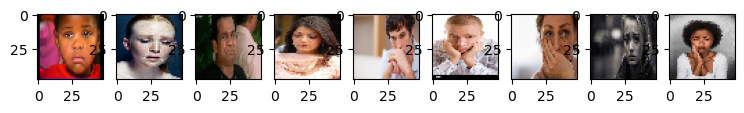

In [10]:
expression = 'sad'

plt.figure(figsize= (9,9))
for i in range(1, 10, 1):
    plt.subplot(9,9,i)
    img = load_img(folder_path+"\\train\\"+expression+"\\"+
               os.listdir(folder_path + "\\train\\" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [11]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"\\train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"\\test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28909 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [23]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
#'val_accuracy'

In [24]:
import os
from tensorflow.keras.callbacks import TensorBoard
#!rm -rf Logs
if os.path.exists("Logs"):
    os.system("rmdir /s /q Logs")
os.makedirs("Logs", exist_ok=True)    
logdir = os.path.join("Logs")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [26]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=[tensorboard_callback]
                                )
#callbacks_list

Epoch 1/48
224/224 [==============================] - 418s 2s/step - loss: 1.6285 - accuracy: 0.3769 - val_loss: 1.7935 - val_accuracy: 0.3218
Epoch 2/48
224/224 [==============================] - 345s 2s/step - loss: 1.3399 - accuracy: 0.4869 - val_loss: 1.4916 - val_accuracy: 0.4149
Epoch 3/48
224/224 [==============================] - 435s 2s/step - loss: 1.2199 - accuracy: 0.5327 - val_loss: 1.2836 - val_accuracy: 0.5063
Epoch 4/48
224/224 [==============================] - 328s 1s/step - loss: 1.1458 - accuracy: 0.5640 - val_loss: 1.5727 - val_accuracy: 0.3997
Epoch 5/48
224/224 [==============================] - 285s 1s/step - loss: 1.0883 - accuracy: 0.5844 - val_loss: 1.1467 - val_accuracy: 0.5544
Epoch 6/48
224/224 [==============================] - 281s 1s/step - loss: 1.0367 - accuracy: 0.6065 - val_loss: 1.2582 - val_accuracy: 0.5333
Epoch 7/48
224/224 [==============================] - 364s 2s/step - loss: 0.9933 - accuracy: 0.6256 - val_loss: 1.1606 - val_accuracy: 0.5653

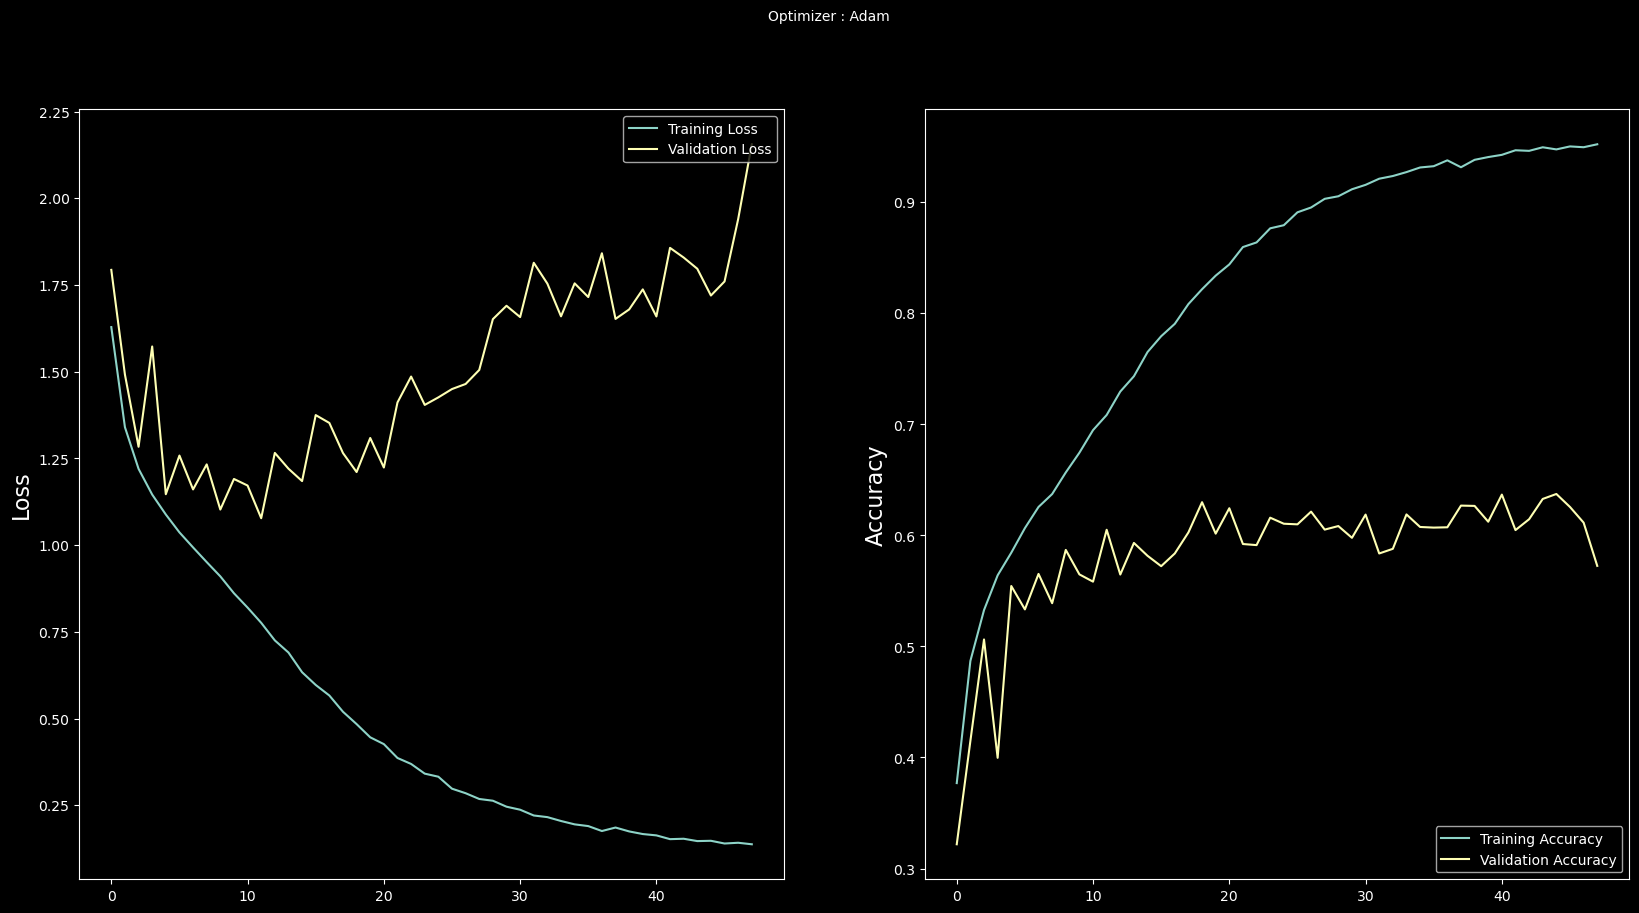

In [27]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [81]:
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np

import os
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import random

face_classifier = cv2.CascadeClassifier(r"D:\B21CS011\mini project\Emotion_Detection_CNN-main\Emotion_Detection_CNN-main\haarcascade_frontalface_default.xml")

classifier =load_model(r"D:\B21CS011\mini project\Emotion_Detection_CNN-main\Emotion_Detection_CNN-main\model.h5" , compile=False)
emotion_labels = ['Angry',' ',' ','Happy','Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)
spotify_opened = False

while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)


        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            
            if label == ' ' or label == 'Surprise':
                label = random.choice(['calm','empower'])
            elif label == 'Sad':
                label = random.choice(['sad','cry'])
            elif label == 'Neutral':
                label = random.choice(['good','soothing'])
            client_id = '2195f44691a240a0a2f8d78fce26772b'
            client_secret = '437f23d4cf3544e8b97e0f346b4a91a8'
            auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
            sp = spotipy.Spotify(auth_manager=auth_manager)

            search_results = sp.search(q=label, type='playlist', limit=1)

            if search_results['playlists']['items']:
                playlist_uri = search_results['playlists']['items'][0]['uri']
                spotify_uri_link = f"spotify:playlist:{playlist_uri.split(':')[-1]}"
                print(f"Spotify Playlist URI: {spotify_uri_link}")
                os.system(f'start {spotify_uri_link}')
                spotify_opened = True
            else:
                print(f"No playlist found for emotion: {label}")
            
            
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q') or spotify_opened:
        break
    sleep(0.5)
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 459ms/step
Spotify Playlist URI: spotify:playlist:37i9dQZF1EIdDn5P759aRj
